# Working With Data

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import tensorflow as tf
%matplotlib inline

# Pandas!

## DataFrame

In [3]:
s = pd.Series(np.random.rand(20))
s

0     0.066781
1     0.089532
2     0.097219
3     0.122249
4     0.866712
5     0.626791
6     0.995432
7     0.034903
8     0.477670
9     0.189810
10    0.708188
11    0.644359
12    0.453811
13    0.433096
14    0.137108
15    0.269870
16    0.166495
17    0.938237
18    0.335023
19    0.411882
dtype: float64

In [4]:
print(s.index)
print(s.values)

RangeIndex(start=0, stop=20, step=1)
[ 0.06678081  0.0895322   0.09721861  0.12224896  0.86671249  0.62679144
  0.99543196  0.03490297  0.47767     0.18980983  0.70818793  0.64435856
  0.45381052  0.43309611  0.13710802  0.26987011  0.16649502  0.93823727
  0.33502268  0.41188211]


In [5]:
s.describe()

count    20.000000
mean      0.403258
std       0.305791
min       0.034903
25%       0.133393
50%       0.373452
75%       0.631183
max       0.995432
dtype: float64

In [10]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(20)})
df.head()

,ser1,ser2
0,0.066781,-0.365330
1,0.089532,0.429195
2,0.097219,0.742269
3,0.122249,-0.917074
4,0.866712,1.274021


In [11]:
df.describe()

,ser1,ser2
count,20.000000,20.000000
mean,0.403258,0.038922
std,0.305791,0.801281
min,0.034903,-1.218955
25%,0.133393,-0.659872
50%,0.373452,0.071757
75%,0.631183,0.632522
max,0.995432,1.557922


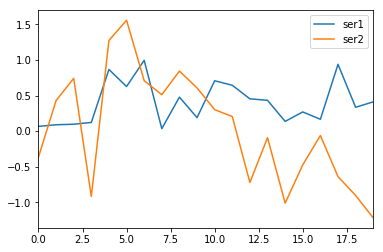

In [12]:
df.plot();

In [13]:
df['ser1']

0     0.066781
1     0.089532
2     0.097219
3     0.122249
4     0.866712
5     0.626791
6     0.995432
7     0.034903
8     0.477670
9     0.189810
10    0.708188
11    0.644359
12    0.453811
13    0.433096
14    0.137108
15    0.269870
16    0.166495
17    0.938237
18    0.335023
19    0.411882
Name: ser1, dtype: float64

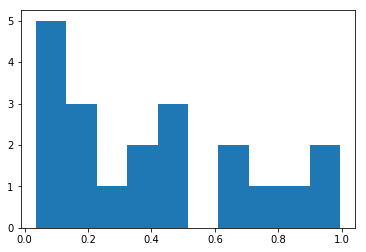

In [16]:
df['ser1'].hist(grid=False);

## Grouping Data

In [22]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [23]:
df.head(10)

,block,value
0,0,-0.452104
1,3,0.381127
2,0,0.188803
3,0,0.188477
4,2,-0.108950
5,3,0.633520
6,2,0.242709
7,1,0.181865
8,2,1.571686
9,1,0.213036


In [24]:
df.groupby('block').size()

block
0    23
1    25
2    23
3    29
dtype: int64

In [25]:
df.groupby('block')['value'].mean()

block
0    0.124214
1    0.196903
2    0.279562
3    0.380746
Name: value, dtype: float64

In [26]:
df.groupby('block')['value'].std()

block
0    0.239809
1    0.084420
2    0.612465
3    0.187891
Name: value, dtype: float64

In [27]:
df.groupby('block')['value'].apply(lambda x: np.mean(np.abs(x-np.mean(x))))

block
0    0.162476
1    0.068577
2    0.499240
3    0.144102
Name: value, dtype: float64

In [17]:
grp = df.groupby('block')['value']
pd.DataFrame({
    'mean': grp.mean(),
    'stdv': grp.std(),
    'absd': grp.apply(lambda x: np.mean(np.abs(x-np.mean(x))))
})

,absd,mean,stdv
block,,,
0,0.152598,0.135355,0.203923
1,0.081698,0.216687,0.109607
2,0.283312,0.293067,0.362891
3,0.135016,0.426619,0.175351


## Time Series

In [31]:
days = pd.date_range('2016-01-01', '2016-12-31', freq='D')
vals = np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')
df.head()

,price
date,
2016-01-01,-0.040733
2016-01-02,0.533661
2016-01-03,1.204063
2016-01-04,1.539268
2016-01-05,0.834441


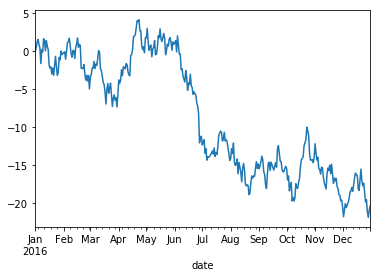

In [32]:
df['price'].plot();

In [33]:
df.groupby(pd.TimeGrouper('MS')).std()

,price
date,
2016-01-01,1.500186
2016-02-01,1.877666
2016-03-01,2.120342
2016-04-01,2.618449
2016-05-01,0.957224
2016-06-01,3.645746
2016-07-01,1.172864
2016-08-01,1.627697
2016-09-01,1.164457


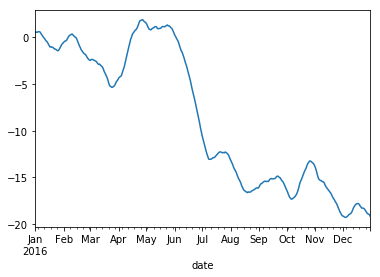

In [34]:
df.rolling(20, center=True, min_periods=1).mean().plot(legend=False);

## Transforming

In [6]:
days = pd.date_range('2006-01-01', '2016-12-31', freq='D')
vals = np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

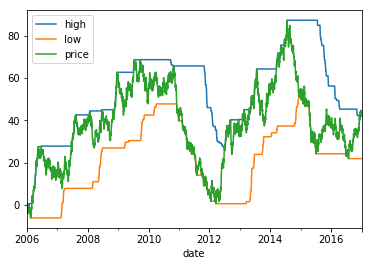

In [8]:
roll = df['price'].rolling(52*7, min_periods=1)
pd.DataFrame({
    'low' : roll.min(),
    'high': roll.max(),
    'price': df['price']
}).plot();

## Joining

In [1]:
mapp = pd.Series({x: 2*x for x in range(10)}, name='twox')
mapp

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
Name: twox, dtype: int64

In [2]:
init = pd.DataFrame({
    'ser': np.random.randint(10, size=100),
    'val': np.random.rand(100)
})
init.head()

,ser,val
0,3,0.192299
1,2,0.850912
2,0,0.745343
3,9,0.548636
4,4,0.425102


In [3]:
final = init.join(mapp, on='ser')
final.head()

,ser,val,twox
0,3,0.192299,6
1,2,0.850912,4
2,0,0.745343,0
3,9,0.548636,18
4,4,0.425102,8


In [4]:
final['check'] = final['twox'] == 2*final['ser']
final.head()

,ser,val,twox,check
0,3,0.192299,6,True
1,2,0.850912,4,True
2,0,0.745343,0,True
3,9,0.548636,18,True
4,4,0.425102,8,True


## Plotting

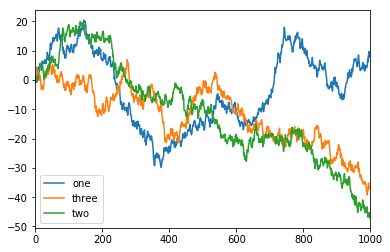

In [10]:
# good way to arrange plots
pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
}).plot();

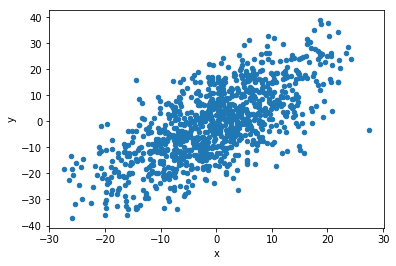

In [11]:
x = 10*np.random.randn(1000)
y = x + 10*np.random.randn(1000)
df = pd.DataFrame({
    'x': x,
    'y': y
})
df.plot.scatter(x='x', y='y');

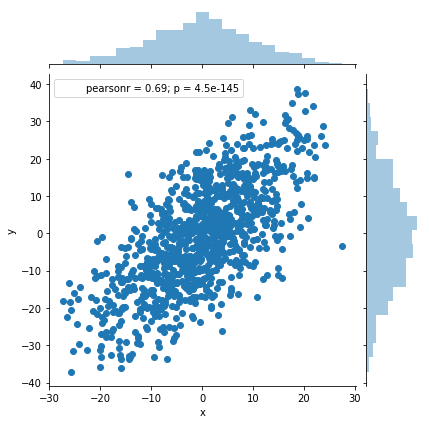

In [12]:
sns.jointplot('x', 'y', data=df);

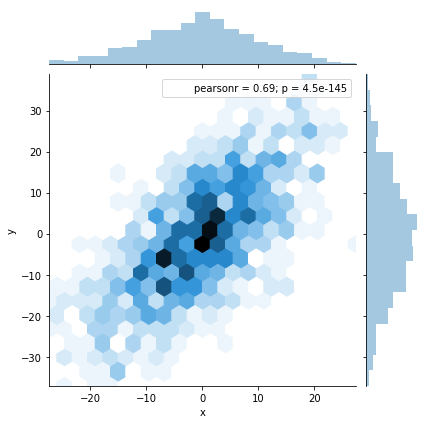

In [13]:
# kind in ['scatter', 'reg', 'resid', 'kde', 'hex']
sns.jointplot('x', 'y', kind='hex', data=df);

## Input/Output

In [53]:
df = pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
})
df.to_csv('test.csv', index=False)

In [54]:
df = pd.read_csv('test.csv')
df.head()

,one,three,two
0,-0.488438,0.114096,1.682526
1,-0.953142,1.565492,0.816656
2,1.127781,1.426357,1.186518
3,0.462729,-1.334617,0.022204
4,0.633908,-3.176799,0.776852


Can also use the many `pd.DataFrame.to_*` and `pd.read_*` function where `*` is one of:
- csv
- excel
- json
- html
- latex
- stata
- sql

# Regressions

## Basic

In [55]:
N = 100
x = np.random.randn(N)
y = 3*np.random.randn(N)
z = 1 + 2*x + 3*y + 4*x*y + np.random.randn(N)
df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

In [56]:
ret = smf.ols('z ~ 1 + x + y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     37.54
Date:                Mon, 16 Oct 2017   Prob (F-statistic):           8.41e-13
Time:                        19:01:35   Log-Likelihood:                -379.96
No. Observations:                 100   AIC:                             765.9
Df Residuals:                      97   BIC:                             773.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8398      1.107      0.759      0.450      -1.356       3.036
x             -0.5213      1.046     -0.498      0.619      -2.597       1.554
y              3.2102      0.371      8.645      0.000       2.473       3.947
==============================================================================
Omnibus:                       13.726   Durbin-Watson:                   2.294
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               48.472
Skew:                           0.077   Prob(JB):                     2.98e-11
Kurtosis:                       6.407   Cond. No.                         3.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
ret.params

Intercept    0.839811
x           -0.521260
y            3.210164
dtype: float64

In [58]:
ret = smf.ols('z ~ 1 + x*y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     5762.
Date:                Mon, 16 Oct 2017   Prob (F-statistic):          3.30e-108
Time:                        19:03:10   Log-Likelihood:                -148.68
No. Observations:                 100   AIC:                             305.4
Df Residuals:                      96   BIC:                             315.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7436      0.110      6.754      0.000       0.525       0.962
x              2.0432      0.107     19.052      0.000       1.830       2.256
y              2.9848      0.037     80.632      0.000       2.911       3.058
x:y            4.0043      0.041     98.500      0.000       3.924       4.085
==============================================================================
Omnibus:                        2.331   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.312   Jarque-Bera (JB):                1.620
Skew:                           0.074   Prob(JB):                        0.445
Kurtosis:                       2.394   Cond. No.                         3.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Categorical

In [59]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [60]:
ret = smf.ols('value ~ 0 + C(block)', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     4.538
Date:                Mon, 16 Oct 2017   Prob (F-statistic):            0.00510
Time:                        19:05:22   Log-Likelihood:                -22.393
No. Observations:                 100   AIC:                             52.79
Df Residuals:                      96   BIC:                             63.21
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(block)[0]     0.1042      0.075      1.390      0.168      -0.045       0.253
C(block)[1]     0.1985      0.066      3.014      0.003       0.068       0.329
C(block)[2]     0.2252      0.055      4.123      0.000       0.117       0.334
C(block)[3]     0.4226      0.057      7.366      0.000       0.309       0.536
==============================================================================
Omnibus:                       30.342   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.254
Skew:                           0.992   Prob(JB):                     1.53e-20
Kurtosis:                       7.239   Cond. No.                         1.37
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
ret.params - cmean

C(block)[0]    0.004178
C(block)[1]   -0.001472
C(block)[2]   -0.074801
C(block)[3]    0.022567
dtype: float64

In [68]:
stderr_reg = np.sqrt(ret.cov_params().values.diagonal())
stderr_rob = np.sqrt(ret.cov_HC0.diagonal())

## Bootstrapping

In [64]:
def gen_block_data(N, cmean, cvars):
    cmean = np.array(cmean)
    cvars = np.array(cvars)
    block = np.random.randint(len(cmean), size=N)
    value = cmean[block]+np.random.randn(N)*cvars[block]
    return pd.DataFrame({
        'block': block,
        'value': value
    })

In [67]:
N = 100
K = 1000
cmean = [0.1, 0.2, 0.3, 0.4]
cvars = [0.2, 0.1, 0.5, 0.2]
mygen = lambda: gen_block_data(N, cmean, cvars)
myeqn = 'value ~ 0 + C(block)'
res = pd.DataFrame({i: smf.ols(myeqn, data=mygen()).fit().params for i in range(K)}).T
res.columns = ['b0', 'b1', 'b2', 'b3']
stderr_bsp = res.std().values

In [69]:
pd.DataFrame({
    'stderr_reg': stderr_reg,
    'stderr_rob': stderr_rob,
    'stderr_bsp': stderr_bsp
}).T

,0,1,2,3
stderr_bsp,0.041298,0.019855,0.104636,0.040482
stderr_reg,0.074929,0.065867,0.054614,0.057369
stderr_rob,0.046212,0.016633,0.083572,0.038704


# Machine Learning

## Regression

$$\log(\mathcal{L}) = -\frac{N}{2}\log(2\pi)-N\log(\sigma)-\sum_i \frac{1}{2}\left(\frac{y_i-\beta x_i}{\sigma}\right)^2$$

In [71]:
N = 1000
dat_x = 10*np.random.randn(N)
dat_y = 1 + 2*dat_x + 3*np.random.randn(N)

In [72]:
x = tf.placeholder(tf.float64, name='x')
y = tf.placeholder(tf.float64, name='y')
data = {x: dat_x, y: dat_y}

In [73]:
beta0 = tf.Variable(2.0, dtype=tf.float64, name='beta0')
beta1 = tf.Variable(1.0, dtype=tf.float64, name='beta1')

In [74]:
yhat = beta0 + beta1*x
mse = tf.reduce_mean((y-yhat)**2)
sigma = (N/(N-1))*tf.sqrt(mse)

In [75]:
init = tf.global_variables_initializer()
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
minn = opt.minimize(mse)

In [76]:
with tf.Session().as_default():
    init.run()
    for i in range(1000):
        minn.run(feed_dict=data)
    print(f'beta0 = {beta0.eval()}')
    print(f'beta1 = {beta1.eval()}')
    print(f'sigma = {sigma.eval(feed_dict=data)}')

beta0 = 1.054179186150941
beta1 = 2.008352125363799
sigma = 3.0075219369534008


In [77]:
df = pd.DataFrame({
    'x': dat_x,
    'y': dat_y
})
ret = smf.ols('y ~ 1 + x', data=df).fit()
print(f'beta0 = {ret.params.iloc[0]}')
print(f'beta1 = {ret.params.iloc[1]}')
print(f'sigma = {np.sqrt(ret.mse_resid)}')

beta0 = 1.0541791845589312
beta1 = 2.0083521253627317
sigma = 3.0075234437275404


## Text Analysis

In [78]:
import re
import json
import time
import html
import sklearn.feature_extraction.text as fe
from sklearn.model_selection import train_test_split
import tflearn
from tflearn.data_utils import to_categorical

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)


In [79]:
def clean_tweet(text):
    text = text.lower().strip()

    # odd subs
    text = re.sub(r'’', '\'', text)
    text = re.sub(r'—', '-', text)

    # urls
    text = re.sub(r'\bhttps?://[\S]*\b', r' ', text)
    text = html.unescape(text)

    # acronyms
    text = re.sub(r'\.{2,}', r'.', text)
    text = re.sub(r'(\S)\.(\S)\.', r'\1\2', text)
    text = re.sub(r'(\S)\.(\S)\.(\S)\.', r'\1\2\3', text)

    # control chars
    text = re.sub(r'([!\.&,])', r' \1 ', text)
    text = re.sub(r'[^ a-z0-9#@!\.&,\']', r' ', text)
    text = re.sub(r'[0-9\']', r'', text)

    # clean up
    text = re.sub(r' {2,}', r' ', text)
    text = text.strip()

    # combine
    return text

In [80]:
tweets16 = pd.read_json('~/data/trump_tweets/condensed_2016.json')
tweets17 = pd.read_json('~/data/trump_tweets/condensed_2017.json')
tweets = pd.concat([tweets16, tweets17])

rt_mark = tweets['text'].apply(lambda s: s.startswith('"@') or s.startswith('rt'))
tweets = tweets[(~tweets['is_retweet'])&(~rt_mark)&tweets['in_reply_to_user_id_str'].isnull()]
tweets['isource'] = tweets['source'].map({'Twitter for iPhone': 0, 'Twitter for Android': 1})
tweets = tweets.dropna(subset=['isource'])
tweets['isource'] = tweets['isource'].astype(np.int)
tweets['clean_text'] = tweets['text'].apply(clean_tweet)

In [83]:
corpus = list(tweets['clean_text'])
categ = to_categorical(tweets['isource'].values, 2)
print(len(corpus))

3460


In [84]:
tfidf = fe.TfidfVectorizer()
counts = tfidf.fit_transform(corpus).todense()
n_twt, n_wrd = counts.shape

In [92]:
(train_x, valid_x, train_y, valid_y) = train_test_split(counts, categ, test_size=0.1)

In [93]:
def generate_nn(n_wrd, nn_size, dropout):
    net = tflearn.input_data([None, n_wrd])
    net = tflearn.fully_connected(net, nn_size, activation='softmax')
    net = tflearn.dropout(net, 1-dropout)
    net = tflearn.fully_connected(net, 2, activation='softmax')
    net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')
    model = tflearn.DNN(net, clip_gradients=0.0, tensorboard_verbose=1,
        tensorboard_dir='/tmp/tflearn_logs/neural', checkpoint_path='checkpoints/neural')
    return model

In [94]:
model = generate_nn(n_wrd, 128, 0.5)

In [95]:
run_id = 'neural_%s' % time.strftime('%Y_%m%d_%H%M')
model.fit(train_x, train_y, validation_set=(valid_x, valid_y),
          show_metric=True, n_epoch=25, run_id=run_id)

Training Step: 1224  | total loss: 0.36626 | time: 2.180s
| Adam | epoch: 025 | loss: 0.36626 - acc: 0.8953 -- iter: 3072/3114
Training Step: 1225  | total loss: 0.36943 | time: 3.230s
| Adam | epoch: 025 | loss: 0.36943 - acc: 0.8901 | val_loss: 0.45805 - val_acc: 0.8035 -- iter: 3114/3114
--
INFO:tensorflow:/Users/doug/work/data_science/checkpoints/neural-1225 is not in all_model_checkpoint_paths. Manually adding it.


In [96]:
valid_prob = model.predict(valid_x)
valid_pred = np.array(valid_prob).argmax(axis=1)
valid_bin = np.array(valid_y).argmax(axis=1)
valid_acc = (valid_bin==valid_pred).mean()

In [98]:
all_prob = model.predict(counts)
android_prob = all_prob[:, 1]
androidy = list(tweets['text'].iloc[android_prob.argsort()[::-1]])